# Exploratory Data Analysis (EDA)

In this jupyter notebook an EDA is done on the data obtained from Gbif. The objectives are:
- Explore the data that has been obtained from that web.
- Understand the information that each column contains.
- See the null values, duplicates, outliers, etc.

In [204]:
# Let's import the libraries that will be needed for this EDA.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sidetable

In [205]:
# To show all the columns of our dataframe.
pd.options.display.max_columns=None

In [206]:
# Create the first dataframe containing the data from the csv obtained from Gbif.
df_0 = pd.read_csv('../data/gbif_mosquito_data.csv', sep='\t')

# Check the first three rows to see how this dataframe looks like.
df_0.head(3)

,gbifID,datasetKey,occurrenceID,kingdom,phylum,class,order,family,genus,species,infraspecificEpithet,taxonRank,scientificName,verbatimScientificName,verbatimScientificNameAuthorship,countryCode,locality,stateProvince,occurrenceStatus,individualCount,publishingOrgKey,decimalLatitude,decimalLongitude,coordinateUncertaintyInMeters,coordinatePrecision,elevation,elevationAccuracy,depth,depthAccuracy,eventDate,day,month,year,taxonKey,speciesKey,basisOfRecord,institutionCode,collectionCode,catalogNumber,recordNumber,identifiedBy,dateIdentified,license,rightsHolder,recordedBy,typeStatus,establishmentMeans,lastInterpreted,mediaType,issue
0,4052772078,1fef1ead-3d02-495e-8ff1-6aeb01123408,e7dbc45e-69c8-4d0d-b19d-109880b51192,Animalia,Arthropoda,Insecta,Diptera,Culicidae,Aedes,Aedes albopictus,NaN,SPECIES,"Aedes albopictus (Skuse, 1894)","Aedes albopictus (Skuse, 1895)","(Skuse, 1895)",ES,NaN,NaN,PRESENT,NaN,7f7b1e09-01e5-4eb3-8dc0-6a3a6bea9a5c,41.51019,2.24589,NaN,NaN,NaN,NaN,NaN,NaN,2022-11-04T00:00:00,4,11,2022,1651430,1651430.0,HUMAN_OBSERVATION,CREAF,Mosquito Alert Tiger Mosquito,NaN,NaN,Roger Eritja,NaN,CC0_1_0,Mosquito Alert,Anonymous Mosquito Alert citizen scientist,NaN,NaN,2023-03-23T07:53:00.251Z,StillImage,CONTINENT_DERIVED_FROM_COORDINATES
1,4052772077,1fef1ead-3d02-495e-8ff1-6aeb01123408,393fc1c6-c24f-479c-b184-5c11c8a2e12d,Animalia,Arthropoda,Insecta,Diptera,Culicidae,Aedes,Aedes albopictus,NaN,SPECIES,"Aedes albopictus (Skuse, 1894)","Aedes albopictus (Skuse, 1895)","(Skuse, 1895)",IT,NaN,NaN,PRESENT,NaN,7f7b1e09-01e5-4eb3-8dc0-6a3a6bea9a5c,44.40289,8.98775,NaN,NaN,NaN,NaN,NaN,NaN,2021-08-27T00:00:00,27,8,2021,1651430,1651430.0,HUMAN_OBSERVATION,CREAF,Mosquito Alert Tiger Mosquito,NaN,NaN,Karin Bakran-Lebl;Ana Klobucar;UNIROMA1;Roger ...,NaN,CC0_1_0,Mosquito Alert,Anonymous Mosquito Alert citizen scientist,NaN,NaN,2023-03-23T07:53:02.575Z,StillImage,CONTINENT_DERIVED_FROM_COORDINATES
2,4052772076,1fef1ead-3d02-495e-8ff1-6aeb01123408,bae42ca3-8861-4a61-926d-380359f6a059,Animalia,Arthropoda,Insecta,Diptera,Culicidae,Culex,NaN,NaN,GENUS,"Culex Linnaeus, 1758","Culex (Linnaeus, 1758)","(Linnaeus, 1758)",NL,NaN,NaN,PRESENT,NaN,7f7b1e09-01e5-4eb3-8dc0-6a3a6bea9a5c,52.14539,5.39437,NaN,NaN,NaN,NaN,NaN,NaN,2021-09-25T00:00:00,25,9,2021,1497010,NaN,HUMAN_OBSERVATION,CREAF,Mosquito Alert Tiger Mosquito,NaN,NaN,Hans-Peter Fuehrer;Mihaela Kavran;Karin Bakran...,NaN,CC0_1_0,Mosquito Alert,Anonymous Mosquito Alert citizen scientist,NaN,NaN,2023-03-23T07:53:02.576Z,StillImage,CONTINENT_DERIVED_FROM_COORDINATES


In [207]:
# Check how many rows and columns has this dataframe.
df_0.shape
print(f'This DataFrame has {df_0.shape[0]} rows and {df_0.shape[1]} columns.')

This DataFrame has 24788 rows and 50 columns.


In [208]:
# Check data types, nulls...
df_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24788 entries, 0 to 24787
Data columns (total 50 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   gbifID                            24788 non-null  int64  
 1   datasetKey                        24788 non-null  object 
 2   occurrenceID                      24788 non-null  object 
 3   kingdom                           24788 non-null  object 
 4   phylum                            24788 non-null  object 
 5   class                             24788 non-null  object 
 6   order                             24788 non-null  object 
 7   family                            24788 non-null  object 
 8   genus                             24788 non-null  object 
 9   species                           15084 non-null  object 
 10  infraspecificEpithet              0 non-null      float64
 11  taxonRank                         24788 non-null  object 
 12  scie

In [209]:
# Check how many null values has each column.
df_0.isnull().sum()

gbifID                                  0
datasetKey                              0
occurrenceID                            0
kingdom                                 0
phylum                                  0
class                                   0
order                                   0
family                                  0
genus                                   0
species                              9704
infraspecificEpithet                24788
taxonRank                               0
scientificName                          0
verbatimScientificName                  0
verbatimScientificNameAuthorship        0
countryCode                             6
locality                            24788
stateProvince                       24788
occurrenceStatus                        0
individualCount                     24788
publishingOrgKey                        0
decimalLatitude                         6
decimalLongitude                        6
coordinateUncertaintyInMeters     

In [210]:
# Check how many duplicated rows are there in the dataframe.
df_0.duplicated().sum()

0

In [211]:
# Create a copy of the original dataframe.
df_1=df_0.copy()
df_1.head(3)

,gbifID,datasetKey,occurrenceID,kingdom,phylum,class,order,family,genus,species,infraspecificEpithet,taxonRank,scientificName,verbatimScientificName,verbatimScientificNameAuthorship,countryCode,locality,stateProvince,occurrenceStatus,individualCount,publishingOrgKey,decimalLatitude,decimalLongitude,coordinateUncertaintyInMeters,coordinatePrecision,elevation,elevationAccuracy,depth,depthAccuracy,eventDate,day,month,year,taxonKey,speciesKey,basisOfRecord,institutionCode,collectionCode,catalogNumber,recordNumber,identifiedBy,dateIdentified,license,rightsHolder,recordedBy,typeStatus,establishmentMeans,lastInterpreted,mediaType,issue
0,4052772078,1fef1ead-3d02-495e-8ff1-6aeb01123408,e7dbc45e-69c8-4d0d-b19d-109880b51192,Animalia,Arthropoda,Insecta,Diptera,Culicidae,Aedes,Aedes albopictus,NaN,SPECIES,"Aedes albopictus (Skuse, 1894)","Aedes albopictus (Skuse, 1895)","(Skuse, 1895)",ES,NaN,NaN,PRESENT,NaN,7f7b1e09-01e5-4eb3-8dc0-6a3a6bea9a5c,41.51019,2.24589,NaN,NaN,NaN,NaN,NaN,NaN,2022-11-04T00:00:00,4,11,2022,1651430,1651430.0,HUMAN_OBSERVATION,CREAF,Mosquito Alert Tiger Mosquito,NaN,NaN,Roger Eritja,NaN,CC0_1_0,Mosquito Alert,Anonymous Mosquito Alert citizen scientist,NaN,NaN,2023-03-23T07:53:00.251Z,StillImage,CONTINENT_DERIVED_FROM_COORDINATES
1,4052772077,1fef1ead-3d02-495e-8ff1-6aeb01123408,393fc1c6-c24f-479c-b184-5c11c8a2e12d,Animalia,Arthropoda,Insecta,Diptera,Culicidae,Aedes,Aedes albopictus,NaN,SPECIES,"Aedes albopictus (Skuse, 1894)","Aedes albopictus (Skuse, 1895)","(Skuse, 1895)",IT,NaN,NaN,PRESENT,NaN,7f7b1e09-01e5-4eb3-8dc0-6a3a6bea9a5c,44.40289,8.98775,NaN,NaN,NaN,NaN,NaN,NaN,2021-08-27T00:00:00,27,8,2021,1651430,1651430.0,HUMAN_OBSERVATION,CREAF,Mosquito Alert Tiger Mosquito,NaN,NaN,Karin Bakran-Lebl;Ana Klobucar;UNIROMA1;Roger ...,NaN,CC0_1_0,Mosquito Alert,Anonymous Mosquito Alert citizen scientist,NaN,NaN,2023-03-23T07:53:02.575Z,StillImage,CONTINENT_DERIVED_FROM_COORDINATES
2,4052772076,1fef1ead-3d02-495e-8ff1-6aeb01123408,bae42ca3-8861-4a61-926d-380359f6a059,Animalia,Arthropoda,Insecta,Diptera,Culicidae,Culex,NaN,NaN,GENUS,"Culex Linnaeus, 1758","Culex (Linnaeus, 1758)","(Linnaeus, 1758)",NL,NaN,NaN,PRESENT,NaN,7f7b1e09-01e5-4eb3-8dc0-6a3a6bea9a5c,52.14539,5.39437,NaN,NaN,NaN,NaN,NaN,NaN,2021-09-25T00:00:00,25,9,2021,1497010,NaN,HUMAN_OBSERVATION,CREAF,Mosquito Alert Tiger Mosquito,NaN,NaN,Hans-Peter Fuehrer;Mihaela Kavran;Karin Bakran...,NaN,CC0_1_0,Mosquito Alert,Anonymous Mosquito Alert citizen scientist,NaN,NaN,2023-03-23T07:53:02.576Z,StillImage,CONTINENT_DERIVED_FROM_COORDINATES


In [212]:
# Check which columns have null in every row.
true_1=df_1.isnull().sum()==df_0.shape[0]
true_2=true_1[true_1==True]
true_2

infraspecificEpithet             True
locality                         True
stateProvince                    True
individualCount                  True
coordinateUncertaintyInMeters    True
coordinatePrecision              True
elevation                        True
elevationAccuracy                True
depth                            True
depthAccuracy                    True
catalogNumber                    True
recordNumber                     True
dateIdentified                   True
typeStatus                       True
establishmentMeans               True
dtype: bool

In [213]:
true_2.shape

(15,)

In [214]:
# Delete the columns with only null values.
df_1.drop(true_2.index,axis=1,inplace=True)
df_1.shape

(24788, 35)

In [215]:
# Check again null values looking at its percentage.
df_1_nulos=df_1.isnull().sum()*100/df_1.shape[0]
df_1_nulos.columns=['column','null_percetaje']
df_1_nulos

gbifID                               0.000000
datasetKey                           0.000000
occurrenceID                         0.000000
kingdom                              0.000000
phylum                               0.000000
class                                0.000000
order                                0.000000
family                               0.000000
genus                                0.000000
species                             39.147975
taxonRank                            0.000000
scientificName                       0.000000
verbatimScientificName               0.000000
verbatimScientificNameAuthorship     0.000000
countryCode                          0.024205
occurrenceStatus                     0.000000
publishingOrgKey                     0.000000
decimalLatitude                      0.024205
decimalLongitude                     0.024205
eventDate                            0.000000
day                                  0.000000
month                             

In [216]:
# Check again null values looking at its percentage.
df_1.stb.missing()

,missing,total,percent
species,9704,24788,39.147975
speciesKey,9704,24788,39.147975
issue,8,24788,0.032274
decimalLongitude,6,24788,0.024205
countryCode,6,24788,0.024205
decimalLatitude,6,24788,0.024205
order,0,24788,0.000000
month,0,24788,0.000000
mediaType,0,24788,0.000000
lastInterpreted,0,24788,0.000000


In [217]:
# This could also be done like this.
df_1_nulos=pd.DataFrame(df_1.isnull().sum()*100/df_1.shape[0]).reset_index()
df_1_nulos.columns=['column','null_percetaje']
df_1_nulos

,column,null_percetaje
0,gbifID,0.000000
1,datasetKey,0.000000
2,occurrenceID,0.000000
3,kingdom,0.000000
4,phylum,0.000000
5,class,0.000000
6,order,0.000000
7,family,0.000000
8,genus,0.000000
9,species,39.147975


In [218]:
# Check for outliers.
numeric=df_1.select_dtypes(include=np.number)
numeric.head(3)

,gbifID,decimalLatitude,decimalLongitude,day,month,year,taxonKey,speciesKey
0,4052772078,41.51019,2.24589,4,11,2022,1651430,1651430.0
1,4052772077,44.40289,8.98775,27,8,2021,1651430,1651430.0
2,4052772076,52.14539,5.39437,25,9,2021,1497010,NaN


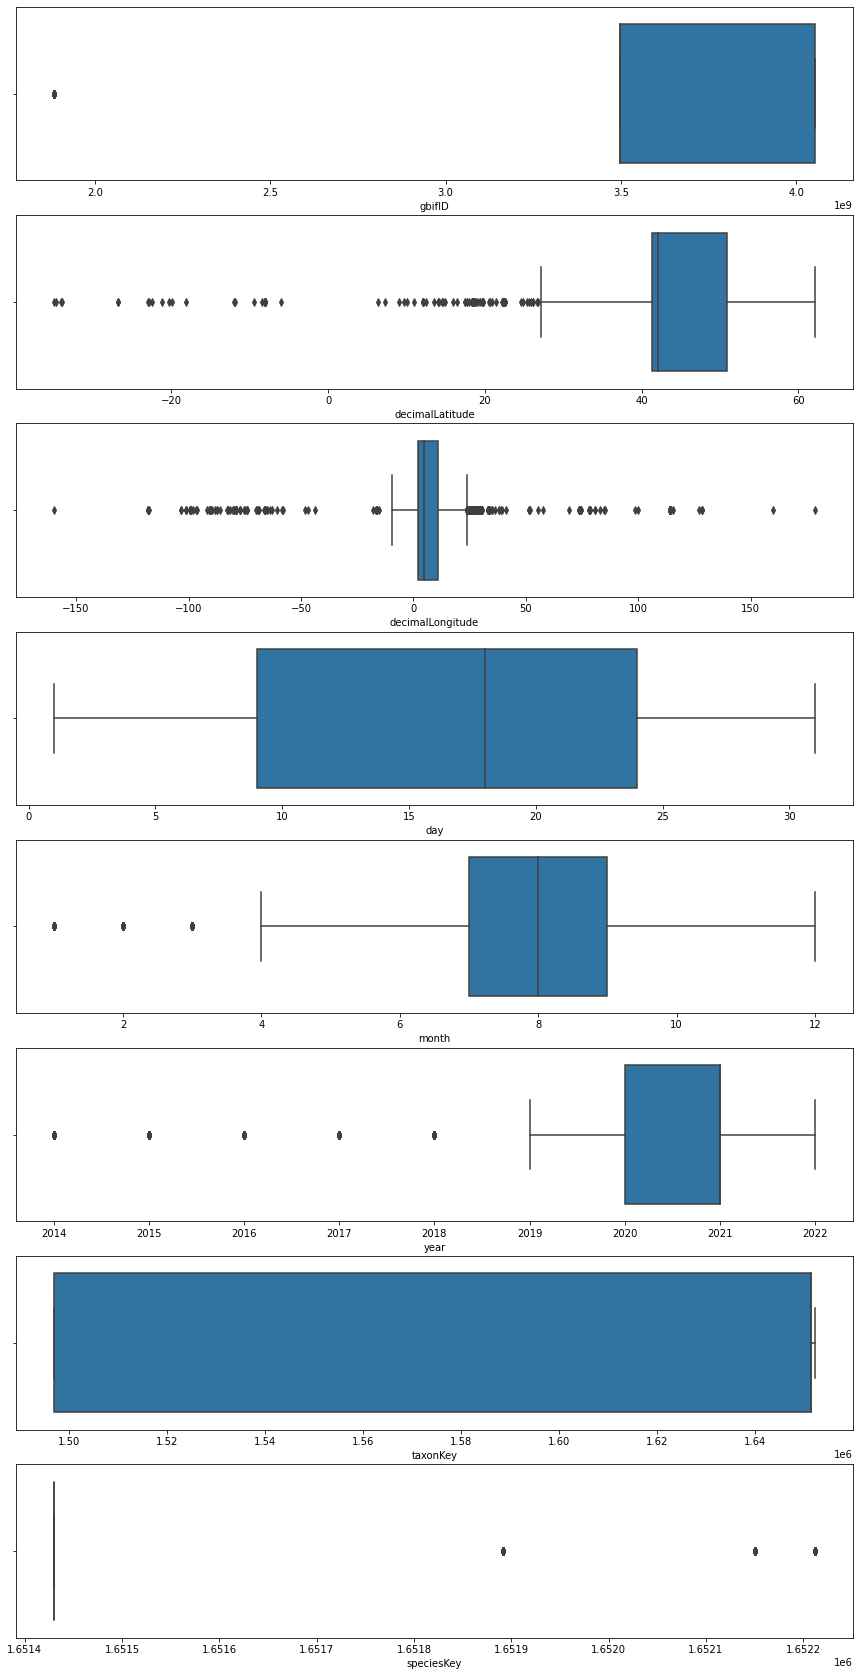

In [228]:
fig, axes =plt.subplots(8,1,figsize=(15,30))
for graph in range(len(numeric.columns)):
    sns.boxplot(x=numeric.columns[graph],data=df_1,ax=axes[graph])
    
plt.show()

In [232]:
# Check for outliers in month using another method.
mean_month=df_1['month'].mean()
std_month=df_1['month'].std()
upper=mean_month + std_month
lower=mean_month - std_month
ucb=mean_month + std_month * 3
lcb=mean_month - std_month * 3

In [ ]:
month_graph=sns.histplot()

In [172]:
# Check the unique values and its quantity.
df_1['species'].value_counts()

Aedes albopictus    14518
Aedes japonicus       360
Aedes koreicus        164
Aedes aegypti          42
Name: species, dtype: int64

In [173]:
df_1['speciesKey'].value_counts()

1651430.0    14518
1652212.0      360
1652150.0      164
1651891.0       42
Name: speciesKey, dtype: int64

In [174]:
# As this two rows have redundant information, one of them will be deleted.
columns_to_delete=['speciesKey']

In [176]:
# Check which other columns won't be used.
df_1['datasetKey'].unique()

array(['1fef1ead-3d02-495e-8ff1-6aeb01123408'], dtype=object)

In [177]:
df_1['occurrenceID'].unique().shape

(24788,)

In [178]:
df_1['kingdom'].unique()

array(['Animalia'], dtype=object)

In [179]:
df_1['phylum'].unique()

array(['Arthropoda'], dtype=object)

In [180]:
df_1['class'].unique()

array(['Insecta'], dtype=object)

In [181]:
df_1['order'].unique()

array(['Diptera'], dtype=object)

In [182]:
df_1['family'].unique()

array(['Culicidae'], dtype=object)

In [183]:
df_1['scientificName'].unique()

array(['Aedes albopictus (Skuse, 1894)', 'Culex Linnaeus, 1758',
       'Aedes japonicus', 'Aedes koreicus (Edwards, 1917)',
       'Aedes aegypti (Linnaeus, 1762)'], dtype=object)

In [184]:
df_1['verbatimScientificName'].unique()

array(['Aedes albopictus (Skuse, 1895)', 'Culex (Linnaeus, 1758)',
       'Aedes japonicus (Theobald, 1901)',
       'Aedes koreicus (Edwards, 1917)', 'Aedes aegypti (Linnaeus, 1762)'],
      dtype=object)

In [185]:
df_1['verbatimScientificNameAuthorship'].unique()

array(['(Skuse, 1895)', '(Linnaeus, 1758)', '(Theobald, 1901)',
       '(Edwards, 1917)', '(Linnaeus, 1762)'], dtype=object)

In [186]:
df_1['occurrenceStatus'].unique()

array(['PRESENT'], dtype=object)

In [187]:
df_1['publishingOrgKey'].unique()

array(['7f7b1e09-01e5-4eb3-8dc0-6a3a6bea9a5c'], dtype=object)

In [188]:
df_1['taxonKey'].unique()

array([1651430, 1497010, 1652212, 1652150, 1651891])

In [189]:
df_1['basisOfRecord'].unique()

array(['HUMAN_OBSERVATION'], dtype=object)

In [190]:
df_1['institutionCode'].unique()

array(['CREAF'], dtype=object)

In [191]:
df_1['collectionCode'].unique()

array(['Mosquito Alert Tiger Mosquito'], dtype=object)

In [192]:
df_1['license'].unique()

array(['CC0_1_0'], dtype=object)

In [193]:
df_1['rightsHolder'].unique()

array(['Mosquito Alert'], dtype=object)

In [194]:
df_1['recordedBy'].unique()

array(['Anonymous Mosquito Alert citizen scientist'], dtype=object)

In [195]:
df_1['mediaType'].unique()

array(['StillImage'], dtype=object)

In [196]:
df_1['issue'].unique()

array(['CONTINENT_DERIVED_FROM_COORDINATES', nan,
       'COUNTRY_COORDINATE_MISMATCH;CONTINENT_DERIVED_FROM_COORDINATES'],
      dtype=object)

In [197]:
# Checking each column one by one to see the information contained, the result is that these columns
#  can be deleted.
columns_to_delete=['speciesKey','datasetKey','kingdom','phylum','class','order','family','scientificName',
                    'verbatimScientificName','verbatimScientificNameAuthorship','occurrenceStatus',
                    'publishingOrgKey','basisOfRecord','institutionCode','collectionCode','license',
                    'rightsHolder','recordedBy','mediaType']

In [198]:
df_1.columns

Index(['gbifID', 'datasetKey', 'occurrenceID', 'kingdom', 'phylum', 'class',
       'order', 'family', 'genus', 'species', 'taxonRank', 'scientificName',
       'verbatimScientificName', 'verbatimScientificNameAuthorship',
       'countryCode', 'occurrenceStatus', 'publishingOrgKey',
       'decimalLatitude', 'decimalLongitude', 'eventDate', 'day', 'month',
       'year', 'taxonKey', 'speciesKey', 'basisOfRecord', 'institutionCode',
       'collectionCode', 'identifiedBy', 'license', 'rightsHolder',
       'recordedBy', 'lastInterpreted', 'mediaType', 'issue'],
      dtype='object')

In [200]:
df_2=df_1.drop(columns_to_delete,axis=1,inplace=False)
df_2.head(3)

,gbifID,occurrenceID,genus,species,taxonRank,countryCode,decimalLatitude,decimalLongitude,eventDate,day,month,year,taxonKey,identifiedBy,lastInterpreted,issue
0,4052772078,e7dbc45e-69c8-4d0d-b19d-109880b51192,Aedes,albopictus,SPECIES,ES,41.51019,2.24589,2022-11-04T00:00:00,4,11,2022,1651430,Roger Eritja,2023-03-23T07:53:00.251Z,CONTINENT_DERIVED_FROM_COORDINATES
1,4052772077,393fc1c6-c24f-479c-b184-5c11c8a2e12d,Aedes,albopictus,SPECIES,IT,44.40289,8.98775,2021-08-27T00:00:00,27,8,2021,1651430,Karin Bakran-Lebl;Ana Klobucar;UNIROMA1;Roger ...,2023-03-23T07:53:02.575Z,CONTINENT_DERIVED_FROM_COORDINATES
2,4052772076,bae42ca3-8861-4a61-926d-380359f6a059,Culex,NaN,GENUS,NL,52.14539,5.39437,2021-09-25T00:00:00,25,9,2021,1497010,Hans-Peter Fuehrer;Mihaela Kavran;Karin Bakran...,2023-03-23T07:53:02.576Z,CONTINENT_DERIVED_FROM_COORDINATES


In [201]:
df_2.columns

Index(['gbifID', 'occurrenceID', 'genus', 'species', 'taxonRank',
       'countryCode', 'decimalLatitude', 'decimalLongitude', 'eventDate',
       'day', 'month', 'year', 'taxonKey', 'identifiedBy', 'lastInterpreted',
       'issue'],
      dtype='object')

In [ ]:
df_2.